<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

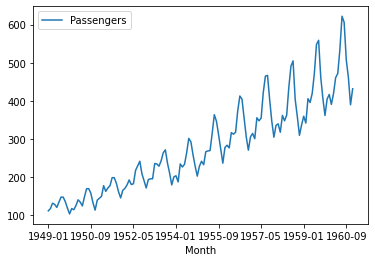

In [100]:
import pandas as pd
from matplotlib import pyplot
ap1=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
ap1=ap1.set_index('Month')
ap1.plot()
pyplot.show()


In [101]:
#Testing for Stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(ap1['Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


Ho:Series is not stationary

Ha:Series is stationary

If significance level(alpha) is 5%, what is the decision?

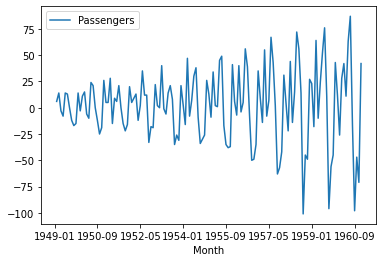

In [102]:
#Take differnce for making stationary
dap = ap1 - ap1.shift(1)
dap.plot()

In [103]:
from statsmodels.tsa.stattools import adfuller
dap=dap.dropna()
result = adfuller(dap['Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.829267
p-value: 0.054213
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


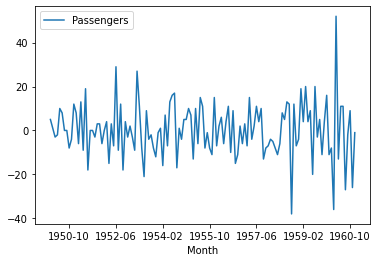

In [104]:
dap = dap - dap.shift(12)
dap.plot()

Q:Is there a seasonality in the data?

In [105]:
from statsmodels.tsa.stattools import adfuller
dap=dap.dropna()
result = adfuller(dap['Passengers'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.595618
p-value: 0.000000
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


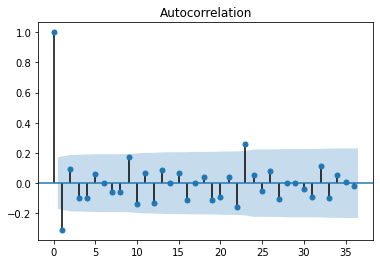

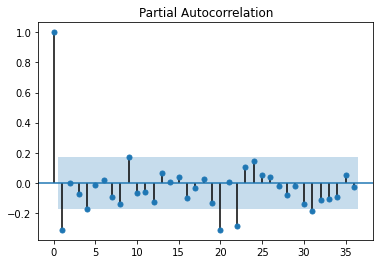

In [106]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

fig = tsaplots.plot_acf(dap['Passengers'], lags=36)
plt.show()
fig = tsaplots.plot_pacf(dap['Passengers'], lags=36)
plt.show()


In [ ]:
Ho:Series is not stationary

Ha:Series is stationary

If significance level(alpha) is 5%, what is the decision?

In [107]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(ap1['Passengers'],order=(1,1,1), seasonal_order=(0,1,0,12))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(0, 1, 0, 12)   Log Likelihood                -508.197
Date:                            Fri, 06 May 2022   AIC                           1022.393
Time:                                    11:01:31   BIC                           1031.019
Sample:                                01-01-1949   HQIC                          1025.898
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3029      0.355     -0.853      0.393      -0.999       0.393
ma.L1         -0.0052      0.336     -0.016      0.988      -0.663       0.652
sigma2       137.0156     14.653      9.350      0.000     108.295     165.736
===================================================================================
Ljung-Box (Q):                       51.72   Jarque-Bera (JB):                 7.71
Prob(Q):                              0.10   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                             0.00
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [108]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(ap1['Passengers'],order=(0,1,1), seasonal_order=(0,1,0,12))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 0, 12)   Log Likelihood                -508.319
Date:                            Fri, 06 May 2022   AIC                           1020.639
Time:                                    11:01:44   BIC                           1026.389
Sample:                                01-01-1949   HQIC                          1022.975
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3184      0.063     -5.038      0.000      -0.442      -0.195
sigma2       137.2653     15.024      9.136      0.000     107.818     166.713
===================================================================================
Ljung-Box (Q):                       52.41   Jarque-Bera (JB):                 5.46
Prob(Q):                              0.09   Prob(JB):                         0.07
Heteroskedasticity (H):               2.37   Skew:                             0.02
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
train=ap[:-12]
test=ap[-12:]
train

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1959-08,559
1959-09,463
1959-10,407


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


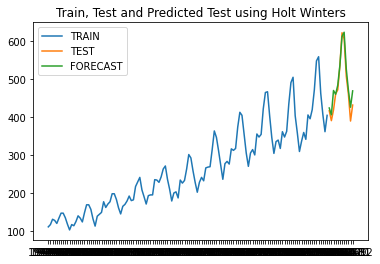

In [113]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train['Passengers'],order=(0,1,1), seasonal_order=(0,1,0,12))
model_fit=model.fit()
test_prediction = model_fit.forecast(12)
test_prediction=pd.DataFrame(test_prediction)
new_index = test.index
test_prediction=test_prediction.set_index(new_index)
test_prediction.columns=['Passengers']
#As we take ln , convert back to original series using exp


plt.plot(train['Passengers'],label='TRAIN')
plt.plot(test['Passengers'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using Holt Winters');

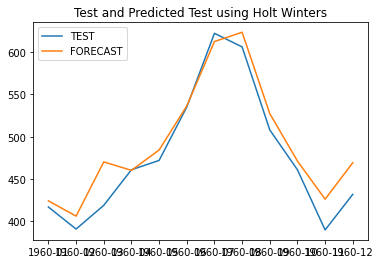

In [114]:
plt.plot(test['Passengers'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Test and Predicted Test using Holt Winters');